In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/samue/OneDrive/Documentos/datasets/clientes.csv")

In [3]:
df.head()

,IDCliente,Dependentes,MesesComoCliente,TipoContrato,FormaPagamento,TotalGasto
0,7010-BRBUU,Sim,72.0,2 anos,CartaoCredito,1734.65
1,9688-YGXVR,Nao,NaN,Mensal,CartaoCredito,3973.2
2,9286-DOJGF,Nao,NaN,Mensal,DebitoAutomatico,2869.85
3,6994-KERXL,Nao,4.0,Mensal,BoletoEletronico,238.5
4,2181-UAESM,Nao,2.0,Mensal,BoletoEletronico,119.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         5986 non-null   object 
 1   Dependentes       5985 non-null   object 
 2   MesesComoCliente  5984 non-null   float64
 3   TipoContrato      5986 non-null   object 
 4   FormaPagamento    5986 non-null   object 
 5   TotalGasto        5986 non-null   object 
dtypes: float64(1), object(5)
memory usage: 280.7+ KB


In [6]:
df["TotalGasto"] = pd.to_numeric(df["TotalGasto"], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         5986 non-null   object 
 1   Dependentes       5985 non-null   object 
 2   MesesComoCliente  5984 non-null   float64
 3   TipoContrato      5986 non-null   object 
 4   FormaPagamento    5986 non-null   object 
 5   TotalGasto        5976 non-null   float64
dtypes: float64(2), object(4)
memory usage: 280.7+ KB


In [8]:
df.head()

,IDCliente,Dependentes,MesesComoCliente,TipoContrato,FormaPagamento,TotalGasto
0,7010-BRBUU,Sim,72.0,2 anos,CartaoCredito,1734.65
1,9688-YGXVR,Nao,NaN,Mensal,CartaoCredito,3973.20
2,9286-DOJGF,Nao,NaN,Mensal,DebitoAutomatico,2869.85
3,6994-KERXL,Nao,4.0,Mensal,BoletoEletronico,238.50
4,2181-UAESM,Nao,2.0,Mensal,BoletoEletronico,119.50


In [9]:
df.isna().sum()

IDCliente            0
Dependentes          1
MesesComoCliente     2
TipoContrato         0
FormaPagamento       0
TotalGasto          10
dtype: int64

In [16]:
#method="ffill" -> Substitui pelo valor anterior
#method="bfill" -> Substitui pelo valor seguinte

df["Dependentes"] = df["Dependentes"].fillna(method="ffill")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         5986 non-null   object 
 1   Dependentes       5986 non-null   object 
 2   MesesComoCliente  5984 non-null   float64
 3   TipoContrato      5986 non-null   object 
 4   FormaPagamento    5986 non-null   object 
 5   TotalGasto        5976 non-null   float64
dtypes: float64(2), object(4)
memory usage: 280.7+ KB


In [18]:
# df_mask=df['Sales']>=300
# filtered_df = df[df_mask]
# print(filtered_df)

df_mask = df["TipoContrato"] == "Mensal"

filtred_df = df[df_mask]
mean_mensal = filtred_df["MesesComoCliente"].mean()


In [19]:
df["MesesComoCliente"].fillna(mean_mensal, inplace=True)
df.head()

,IDCliente,Dependentes,MesesComoCliente,TipoContrato,FormaPagamento,TotalGasto
0,7010-BRBUU,Sim,72.000000,2 anos,CartaoCredito,1734.65
1,9688-YGXVR,Nao,18.068258,Mensal,CartaoCredito,3973.20
2,9286-DOJGF,Nao,18.068258,Mensal,DebitoAutomatico,2869.85
3,6994-KERXL,Nao,4.000000,Mensal,BoletoEletronico,238.50
4,2181-UAESM,Nao,2.000000,Mensal,BoletoEletronico,119.50


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         5986 non-null   object 
 1   Dependentes       5986 non-null   object 
 2   MesesComoCliente  5986 non-null   float64
 3   TipoContrato      5986 non-null   object 
 4   FormaPagamento    5986 non-null   object 
 5   TotalGasto        5976 non-null   float64
dtypes: float64(2), object(4)
memory usage: 280.7+ KB


In [21]:
df_mask1 = df["TotalGasto"].mean()
df["TotalGasto"] = df["TotalGasto"].fillna(df_mask1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         5986 non-null   object 
 1   Dependentes       5986 non-null   object 
 2   MesesComoCliente  5986 non-null   float64
 3   TipoContrato      5986 non-null   object 
 4   FormaPagamento    5986 non-null   object 
 5   TotalGasto        5986 non-null   float64
dtypes: float64(2), object(4)
memory usage: 280.7+ KB


C:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


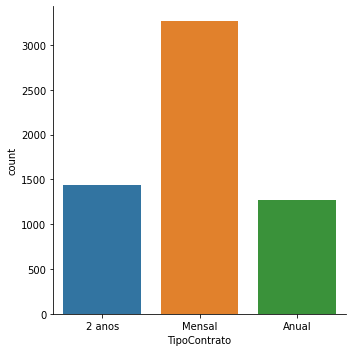

In [23]:
sns.factorplot("TipoContrato",data=df, kind="count")

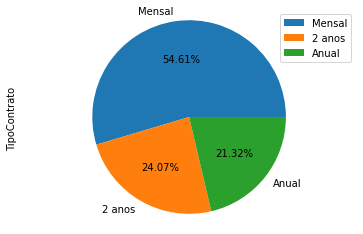

In [33]:
df.TipoContrato.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo
plt.legend(["Mensal", "2 anos", "Anual"])